## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

Student ID: 48002011
Student Name: Quang Huy Vo

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head(10)

,review,item,gender,category
0,Not always McCrap,McDonald's,M,Restaurants & Gourmet
1,I dropped the chalupa even before he told me to,Taco Bell,M,Restaurants & Gourmet
2,The Wonderful World of Wendy,Wendy's,M,Restaurants & Gourmet
3,They actually did it,"South Park: Bigger, Longer & Uncut",M,Movies
4,Hey! Gimme some pie!,American Pie,M,Movies
5,Good for sci-fi,Matrix,M,Movies
6,Scary? you bet!,Blair Witch Project,M,Movies
7,Fox - the 4th basic channel,FOX,M,Media
8,Amen!,Dogma,M,Movies
9,mama mia!,Olive Garden,M,Restaurants & Gourmet


In [6]:
ord_enc = OrdinalEncoder()
df['gender_code'] = ord_enc.fit_transform(df[['gender']])
df['category_code'] = ord_enc.fit_transform(df[['category']])
df['review_code'] = ord_enc.fit_transform(df[['review']])
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,gender_code,category_code,review_code
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,1.0,8.0,1618.0
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,1.0,8.0,1125.0
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,1.0,8.0,2185.0
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,1.0,5.0,2243.0
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,1.0,5.0,1033.0


In [7]:
df['gender_code'].corr(df['rating'])
df['category_code'].corr(df['rating'])
df['review_code'].corr(df['rating'])
df['helpfulness'].corr(df['rating'])

print("Correlation between gender and rating:", df['gender_code'].corr(df['rating']))
print("Correlation between category and rating:", df['category_code'].corr(df['rating']))
print("Correlation between review and rating:", df['review_code'].corr(df['rating']))
print("Correlation between helpfulness and rating:", df['helpfulness'].corr(df['rating']))

Correlation between gender and rating: -0.03433661424208267
Correlation between category and rating: -0.16315765340915647
Correlation between review and rating: -0.036118386552122385
Correlation between helpfulness and rating: -0.007523337726844577


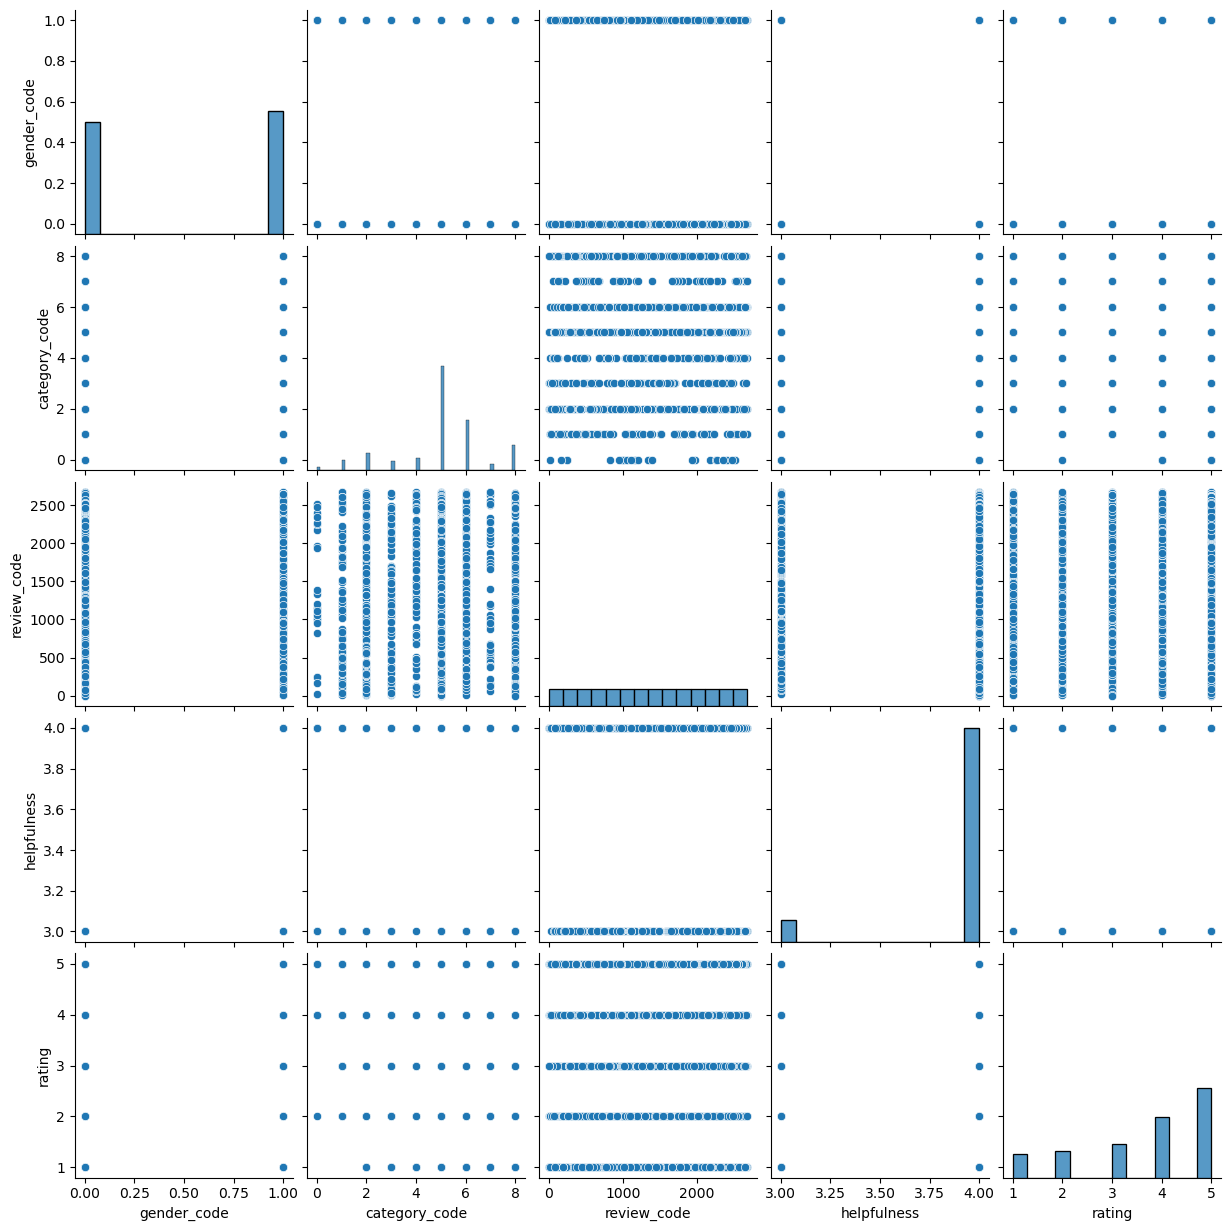

In [8]:
df1 = df[['gender_code', 'category_code', 'review_code', 'helpfulness', 'rating']].copy()
df1.head()
sns.pairplot(df1)

# Analysis

Based on the above results, Category and Rating Correlation is the most correlated features, provides a moderate negative correlation, which implies a more noticeable impact on the model's predictions if we include this feature in a regression model. In contrast, gender, review indicate a weak correlation with rating since the values are closed to 0, implies that these aspects have minimal influences on ratings and do not yield substantial improvements in prediction accurarry. Helpfulness is the least correlated features, which might not add much value to the model. 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [9]:
X = df[['helpfulness', 'gender_code', 'category_code', 'review_code']]
y = df['rating']

most_correlated_features = ['category_code', 'review_code']
least_correlated_features = ['gender_code', 'helpfulness']

In [10]:
#Case 1:
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(X, y, train_size =0.1, random_state=142)
print(X_train_case1.shape, X_test_case1.shape)

(268, 4) (2417, 4)


In [11]:
#Case 2: 
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(X, y, train_size = 0.9, random_state=142)
print(X_train_case2.shape, X_test_case2.shape)

(2416, 4) (269, 4)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [12]:
# Create Linear Regression models
model_a = LinearRegression()
model_b = LinearRegression()
model_c = LinearRegression()
model_d = LinearRegression()

# Train 
model_a.fit(X_train_case1[most_correlated_features], y_train_case1)
model_b.fit(X_train_case1[least_correlated_features], y_train_case1)
model_c.fit(X_train_case2[most_correlated_features], y_train_case2)
model_d.fit(X_train_case2[least_correlated_features], y_train_case2)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [13]:
# Predict
predicted_a = model_a.predict(X_test_case1[most_correlated_features])
predicted_b = model_b.predict(X_test_case1[least_correlated_features])
predicted_c = model_c.predict(X_test_case2[most_correlated_features])
predicted_d = model_d.predict(X_test_case2[least_correlated_features])

# MSE and Root MSE
mse_a = mean_squared_error(y_test_case1, predicted_a)
rmse_a = sqrt(mse_a)

mse_b = mean_squared_error(y_test_case1, predicted_b) 
rmse_b = sqrt(mse_b)

mse_c = mean_squared_error(y_test_case2, predicted_c)
rmse_c = sqrt(mse_c)

mse_d = mean_squared_error(y_test_case2, predicted_d)
rmse_d = sqrt(mse_d)

# Print the results
print("Model A (Case 1):")
print("MSE:", mse_a)
print("Root MSE", rmse_a)

print("\nModel B (Case 1):")
print("MSE:", mse_b)
print("Root MSE", rmse_b)

print("\nModel C (Case 2):")
print("MSE:", mse_c)
print("Root MSE", rmse_c)

print("\nModel D (Case 2):")
print("MSE:", mse_d)
print("Root MSE", rmse_d)


Model A (Case 1):
MSE: 1.7690740179517055
Root MSE 1.3300654186737229

Model B (Case 1):
MSE: 1.8412549895856636
Root MSE 1.356928513071217

Model C (Case 2):
MSE: 1.758897535980505
Root MSE 1.3262343442923294

Model D (Case 2):
MSE: 1.8109460127732369
Root MSE 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<function matplotlib.pyplot.show(close=None, block=None)>

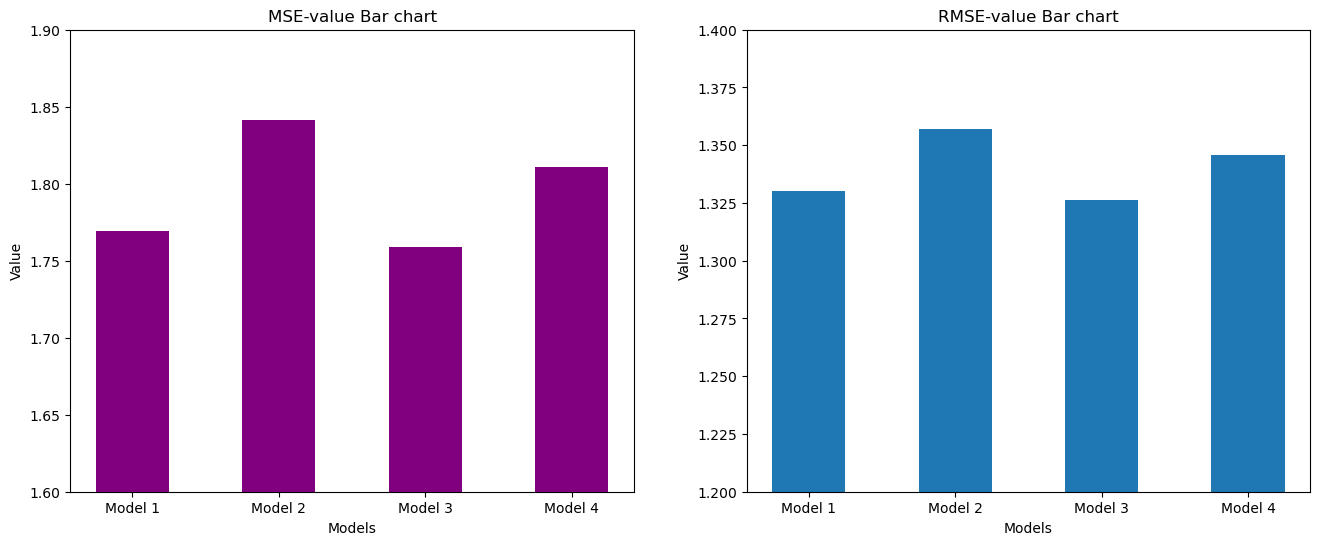

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.bar(["Model 1","Model 2","Model 3","Model 4"],[mse_a, mse_b, mse_c, mse_d], width = 0.5, color = 'purple')
plt.xlabel('Models')
plt.ylabel('Value')
plt.ylim(1.6, 1.9)
plt.title('MSE-value Bar chart')

plt.subplot(1, 2, 2)
plt.bar(["Model 1","Model 2","Model 3","Model 4"],[rmse_a, rmse_b, rmse_c, rmse_d], width = 0.5)
plt.xlabel('Models')
plt.ylabel('Value')
plt.ylim(1.2, 1.4)
plt.title('RMSE-value Bar chart')
plt.show

# Overall Analysis